# Linear Regression 

A statistical model used to predict the relationship between independend and dependent variables

y = m * x + c

y = dependent variable
x = independent variable
c = coefficient of the line ie where happens to cross the 0 axis

m = Slope of the line
i.e the movement of y divided by the movement of x

(y2 - y1) / (x2 - x1)

The regression line is the that best passes through the data points 

In [141]:
import pandas as pd
import numpy as py
from matplotlib import pyplot as plt
import seaborn as sns

sample = {'x':[1,2,3,4,5],
         'y':[2,4,5,4,5]}

sample1 = pd.DataFrame(sample)

#plt.scatter(sample1['x'], sample1['y'])
#plt.annotate

xmean = sample1['x'].mean()
ymean = sample1['y'].mean()
print(xmean, ymean)

3.0 4.0


In [238]:
xsquared = [i**2 for i in sample['x']]
ysquared = [i**2 for i in sample['y']]


sample1['xsquared'] = [i**2 for i in sample['x']]
sample1['ysquared'] = [i**2 for i in sample['y']]


for i in range(0,len(sample1['x'])):
    xy = sample1['x'] * sample1['y']

sample1['X*Y'] = xy
sample1

,x,y,xsquared,ysquared,X*Y
0,1,2,1,4,2
1,2,4,4,16,8
2,3,5,9,25,15
3,4,4,16,16,16
4,5,5,25,25,25


In [121]:
xsum = sum(sample1['x'])
ysum = sum(sample1['y'])
xsquaredsum = sum(sample1['xsquared'])
ysquaredsum = sum(sample1['ysquared'])
XYsum =  sum(sample1['X*Y'])

print(xsum,ysum,xsquaredsum, ysquaredsum, XY)

15 20 55 86 66


Regression Formular 

m = ((n * ∑(x*y)) – (∑(x)* ∑(y)) / ((n*∑(x²)) – (∑(x) ²)

c = 2.2 ## remember to include formular

n = number of rows i.e 5

In [122]:
m = ((5 * XYsum) - (xsum * ysum)) / ((5 * xsquaredsum) - (xsum **2))
c = 2.2
m

0.6

In [123]:
ypred = []

for i in sample1['x']:
   ypred.append((round((i * m  + c),2)))


sample1['ypred'] = pd.DataFrame(ypred)

sample1




,x,y,xsquared,ysquared,X*Y,ypred
0,1,2,1,4,2,2.8
1,2,4,4,16,8,3.4
2,3,5,9,25,15,4.0
3,4,4,16,16,16,4.6
4,5,5,25,25,25,5.2


In [136]:
for i in sample1['y']:
    yminusypred = sample1['y'] - sample1['ypred']
    yminusypredsquared = yminusypred **2
    
sample1['yminusypred'] = yminusypred
sample1['yminusypredsquared'] = yminusypredsquared

sample1
    


,x,y,xsquared,ysquared,X*Y,ypred,yminusypred,yminusypredsquared
0,1,2,1,4,2,2.8,-0.8,0.64
1,2,4,4,16,8,3.4,0.6,0.36
2,3,5,9,25,15,4.0,1.0,1.00
3,4,4,16,16,16,4.6,-0.6,0.36
4,5,5,25,25,25,5.2,-0.2,0.04


Since we have the m and the we can now any additional x values ( independent value) and predict y

eg.  x  = 7

y = 7 * 0.6 + 2.2
y = 6.4


# Companies Data Set

1. Import companies CSV
2. Use seaborn to visualize and oberserve any correlation between data

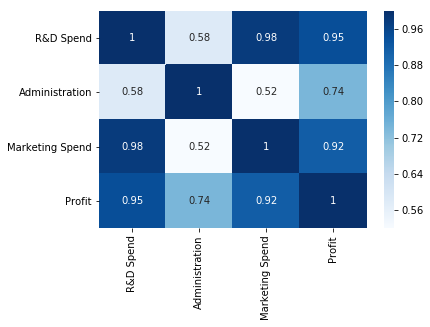

In [314]:
companies = pd.read_csv("C:/Users/mrjod/Desktop/Sample Data Sets for Data Science and STudying/1000_Companies Data/1000_Companies.csv")
companies.head()



sns.heatmap(companies.corr(), annot = True,cmap="Blues")

3. the data set included categorical data for the State column. Dummy columns were created and added to the the companies 
   dataset, dropping the original State column

In [329]:
newstate = pd.get_dummies(companies['State'])
companies['California'] = newstate['California']
companies['New York'] = newstate['New York']
companies['Florida'] = newstate['Florida']

companies1=companies.drop('State', axis = 1)

companies1

,R&D Spend,Administration,Marketing Spend,Profit,New York,Florida,California
0,165349.20,136897.8000,471784.10000,192261.83000,1,0,0
1,162597.70,151377.5900,443898.53000,191792.06000,0,0,1
2,153441.51,101145.5500,407934.54000,191050.39000,0,1,0
3,144372.41,118671.8500,383199.62000,182901.99000,1,0,0
4,142107.34,91391.7700,366168.42000,166187.94000,0,1,0
5,131876.90,99814.7100,362861.36000,156991.12000,1,0,0
6,134615.46,147198.8700,127716.82000,156122.51000,0,0,1
7,130298.13,145530.0600,323876.68000,155752.60000,0,1,0
8,120542.52,148718.9500,311613.29000,152211.77000,1,0,0
9,123334.88,108679.1700,304981.62000,149759.96000,0,0,1


4. X and Y variables were created.
5. The dataset was split into Testing and Training
6. The LinearRegression was imported and used 

In [330]:
X = companies1.drop('Profit', axis = 1)
Y = companies1['Profit']


In [331]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0, test_size = 0.2)

In [332]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [333]:
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.2293644 ,  91473.37719687,
       164597.05380606,  53222.82667401,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143051,
       118248.14406603, 164574.40699901, 170937.28981069, 182069.11645084,
       118845.03252689,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669092,  56881.41475225,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130747, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532178,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

7. The known values were compared to the predicted values to provide the R2 

In [336]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.9112695892268795

[4, 3]
